<a href="https://colab.research.google.com/github/MusaibSyd/Deeplearning/blob/main/Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi


Tue Oct 18 03:58:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21597, 21)

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Figure size 720x432 with 0 Axes>

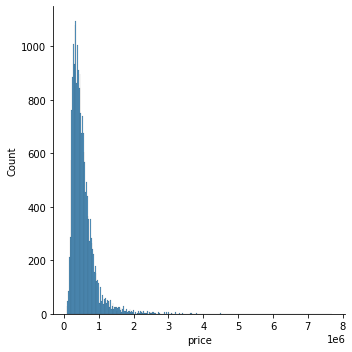

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(df['price'])

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

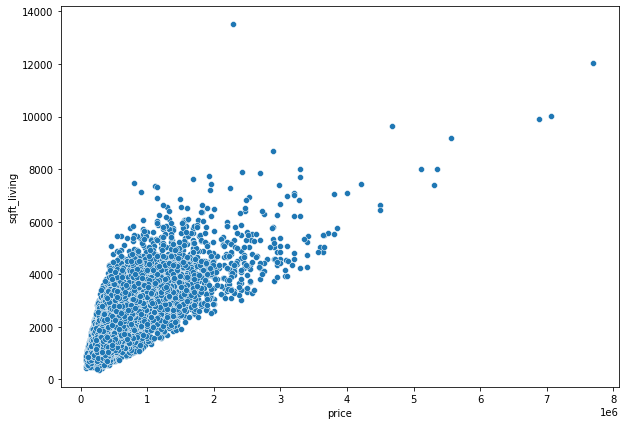

In [9]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='price', y='sqft_living', data=df)

In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
non_top_1_perc=df.sort_values('price', ascending=False).iloc[216:]

In [28]:

df=df.drop('date',axis=1)

KeyError: ignored

In [29]:
X=df.drop('price', axis=1)

In [30]:
y=df['price']

In [31]:
y.shape

(21597,)

In [32]:
X.shape

(21597, 18)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler=MinMaxScaler()

In [37]:
X_train=scaler.fit_transform(X_train)

In [38]:
X_test=scaler.transform(X_test)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
model=Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [43]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test), 
          batch_size=128,
          epochs=400)

Epoch 1/400
119/119 [==============================] - 4s 5ms/step - loss: 430239088640.0000 - val_loss: 418923184128.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 429566492672.0000 - val_loss: 416720781312.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 420879007744.0000 - val_loss: 396696518656.0000
Epoch 4/400
119/119 [==============================] - 0s 4ms/step - loss: 375906172928.0000 - val_loss: 319607242752.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 261546213376.0000 - val_loss: 180313571328.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 136189378560.0000 - val_loss: 100290969600.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 99404423168.0000 - val_loss: 93983727616.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 96676896768.0000 - val_loss: 92616302592.0000
Epoch 9/400
119/119 

In [44]:
model.history.history

{'loss': [430239088640.0,
  429566492672.0,
  420879007744.0,
  375906172928.0,
  261546213376.0,
  136189378560.0,
  99404423168.0,
  96676896768.0,
  95160393728.0,
  93691002880.0,
  92150095872.0,
  90601308160.0,
  89021202432.0,
  87386226688.0,
  85679398912.0,
  83919667200.0,
  82069618688.0,
  80229654528.0,
  78325751808.0,
  76391489536.0,
  74381918208.0,
  72326692864.0,
  70265004032.0,
  68147896320.0,
  66078486528.0,
  64024260608.0,
  62078070784.0,
  60178268160.0,
  58433363968.0,
  56920043520.0,
  55577321472.0,
  54374842368.0,
  53362552832.0,
  52449853440.0,
  51742044160.0,
  51013615616.0,
  50403909632.0,
  49861533696.0,
  49375494144.0,
  48869130240.0,
  48415649792.0,
  48019845120.0,
  47620300800.0,
  47238582272.0,
  46912573440.0,
  46593212416.0,
  46257827840.0,
  45955837952.0,
  45650714624.0,
  45346160640.0,
  45035892736.0,
  44717293568.0,
  44411285504.0,
  44109160448.0,
  43742965760.0,
  43479506944.0,
  43110289408.0,
  42815090688.0,


In [47]:
losses=pd.DataFrame(model.history.history)

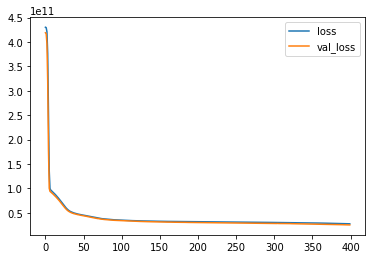

In [48]:
losses.plot()

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [51]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 2ms/step


In [53]:
np.sqrt(mean_squared_error(y_test, predictions))

158586.90175482782

In [54]:
mean_absolute_error(y_test, predictions)

96098.16416859569

In [65]:
single_house=scaler.transform(single_house.values.reshape(-1,18))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [61]:
single_house=df.drop('price', axis=1).iloc[0] 

In [64]:
single_house

id               7.129301e+09
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
yr_built         1.955000e+03
yr_renovated     0.000000e+00
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
Name: 0, dtype: float64

In [66]:
single_house.shape

(1, 18)

In [67]:
model.predict(single_house)

1/1 [==============================] - 0s 17ms/step


array([[301501.2]], dtype=float32)

In [68]:
df.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
